In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(suppress=True)

Heart Disease data from uci ml website  
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [2]:
col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
             'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal','num']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', 
                 header=None, names=col_names)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [5]:
df.shape

(303, 14)

In [6]:
df.num.unique()

array([0, 2, 1, 3, 4])

In [7]:
df['num'] = np.where(df.num==0, 0, 1)

In [8]:
df.num.unique()

array([0, 1])

In [9]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [10]:
df.thal.unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [11]:
df.replace('?', np.nan, inplace=True)

In [12]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', nan], dtype=object)

In [13]:
df.ca = df.ca.astype(np.float)

In [14]:
df.thal = df.thal.astype(np.float)

In [15]:
df['ca'].unique()

array([ 0.,  3.,  2.,  1., nan])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [17]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Visualization is an important part of data analysis and its value should not be underestimated.

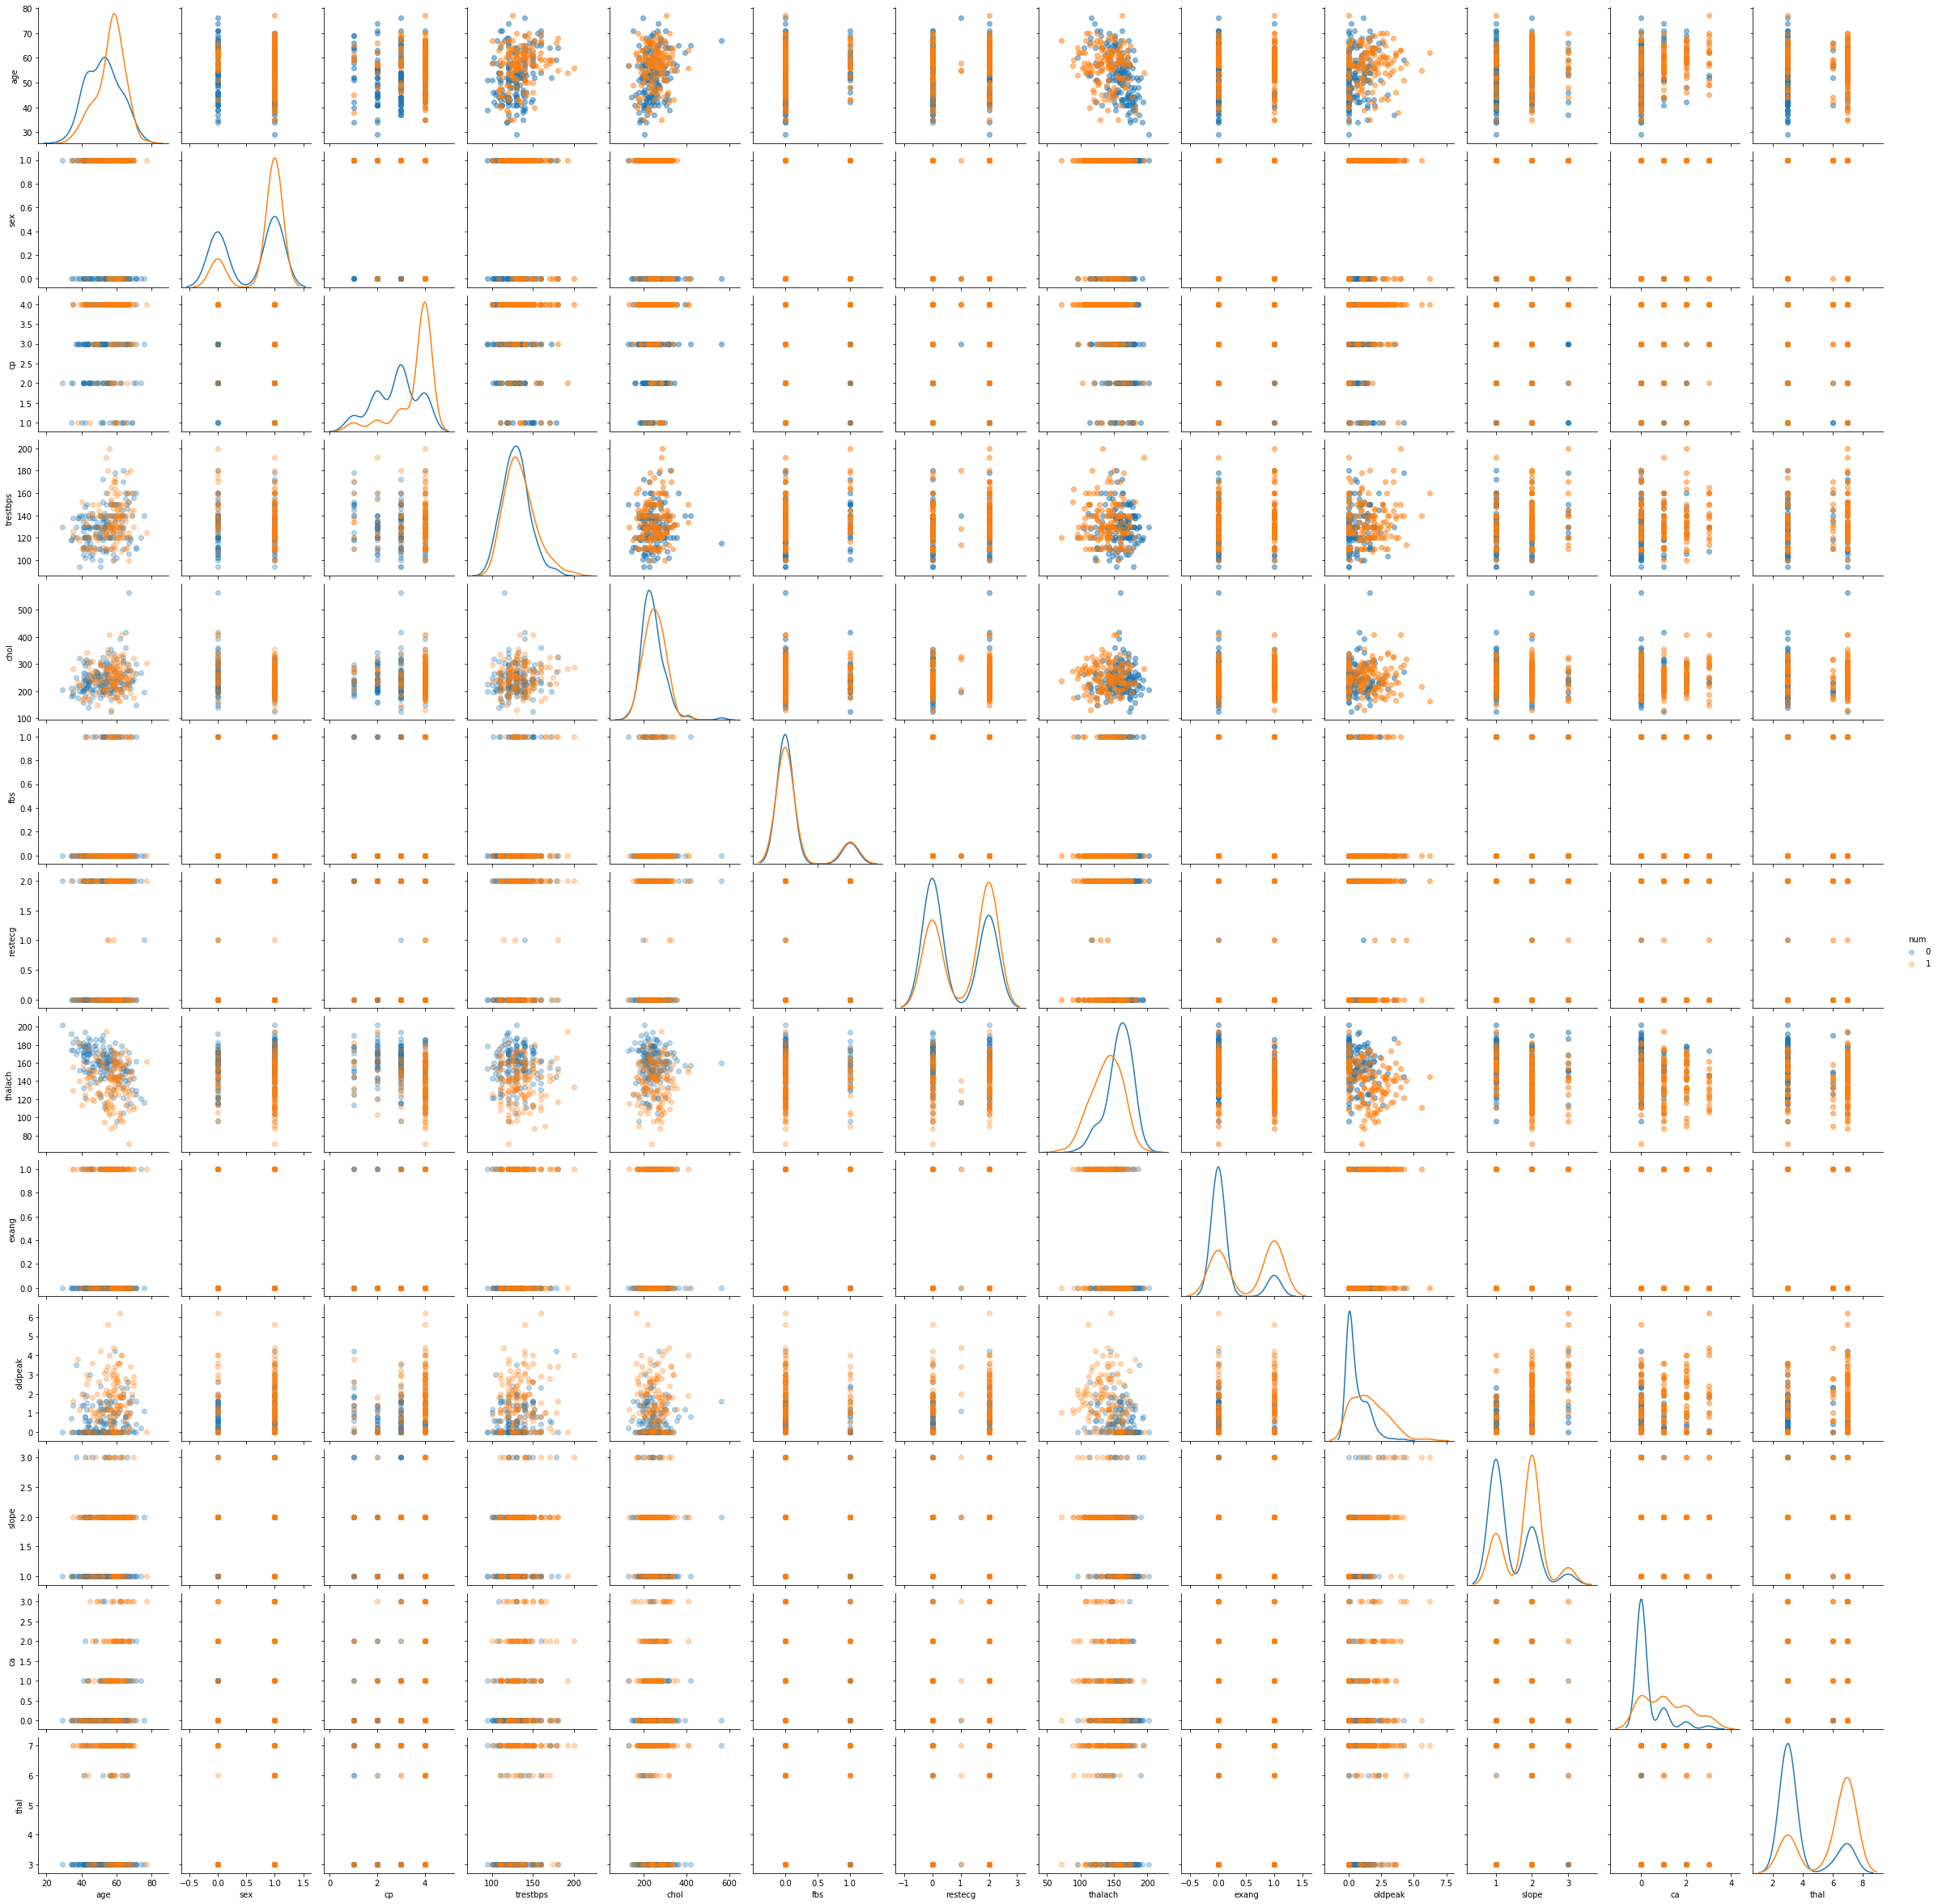

In [18]:
g=sns.PairGrid(data=df, diag_sharey= False, hue='num')
# g.map_diag(plt.hist, bins=20, alpha=0.9, density=False, histtype='barstacked')
g.map_diag(sns.kdeplot)
g.map_upper(plt.scatter, alpha = 0.5)
g.map_lower(sns.regplot,fit_reg= False, scatter_kws={'alpha':0.3})

g.add_legend()

In [19]:
X = df.drop('num', axis=1)

In [20]:
y = df.num

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=20)

# Imputing NaN



In [24]:
from sklearn.impute import SimpleImputer

In [26]:
imputer = SimpleImputer(strategy = 'most_frequent')

In [27]:
imputer.fit(X_train)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [28]:
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# One Hot Encoding

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [46]:
mask = df.columns.isin(['cp', 'restecg', 'slope', 'thal'])

In [56]:
cat = df.loc[:, mask]

In [57]:
cat

,cp,restecg,slope,thal
0,1.0,2.0,3.0,6.0
1,4.0,2.0,2.0,3.0
2,4.0,2.0,2.0,7.0
3,3.0,0.0,3.0,3.0
4,2.0,2.0,1.0,3.0
...,...,...,...,...
298,1.0,0.0,2.0,7.0
299,4.0,0.0,2.0,7.0
300,4.0,0.0,2.0,7.0
301,2.0,2.0,2.0,3.0


In [87]:
cat_uniques_list = [df[col].unique() for col in  np.array(cat.columns)]
cat_uniques_list

[array([1., 4., 3., 2.]),
 array([2., 0., 1.]),
 array([3., 2., 1.]),
 array([ 6.,  3.,  7., nan])]

In [88]:
enc = OneHotEncoder(categories='auto', handle_unknown='ignore', sparse=False)

In [89]:
enc.fit(X_train)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=False)

In [90]:
X_train2 = enc.transform(X_train)
X_test2 = enc.transform(X_test)

In [91]:
X_train2[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [92]:
X_train2.shape

(242, 365)

# Logistic Regression

In [143]:
from sklearn.linear_model import LogisticRegression

In [144]:
from sklearn import metrics

In [145]:
clf = LogisticRegression()

In [146]:
clf.fit(X_train2, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [147]:
pred = clf.predict(X_test2)

In [148]:
metrics.accuracy_score(y_test, pred)

0.9016393442622951

In [149]:
metrics.zero_one_loss(y_test,pred) + metrics.accuracy_score(y_test, pred)

1.0

In [150]:
metrics.confusion_matrix(y_test, pred)

array([[32,  1],
       [ 5, 23]], dtype=int64)

In [151]:
print(metrics.classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.86      0.97      0.91        33
          1       0.96      0.82      0.88        28

avg / total       0.91      0.90      0.90        61



In [152]:
df.num.value_counts() # balanced data

0    164
1    139
Name: num, dtype: int64

In [153]:
from sklearn.linear_model import LogisticRegression

In [154]:
clf = LogisticRegression(C=1)

In [155]:
C_vals = [0.0001, 0.001, 0.01, 0.03, 0.1, 0.3, 0.6, 1, 1.3, 1.6, 2, 5, 10, 15, 20, 50, 100]
C_vals

[0.0001,
 0.001,
 0.01,
 0.03,
 0.1,
 0.3,
 0.6,
 1,
 1.3,
 1.6,
 2,
 5,
 10,
 15,
 20,
 50,
 100]

In [156]:
scores = []
for C in C_vals:
    clf = LogisticRegression(C=C)
    clf.fit(X_train2, y_train)
    pred=clf.predict(X_test2)
    scores.append(metrics.zero_one_loss(y_test, pred))

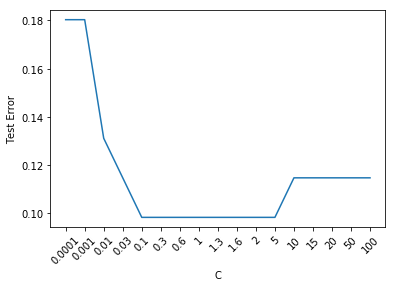

In [157]:
plt.plot(scores)
plt.xticks(np.arange(len(C_vals)), C_vals, rotation=45)
plt.xlabel('C')
plt.ylabel('Test Error')

plt.show()

# Train-Test Split

In [158]:
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train2, y_train, test_size= 0.20, random_state=20)

In [159]:
scores_tr = []
scores_val = []
for C in C_vals:
    clf = LogisticRegression(C=C)
    clf.fit(X_train_val, y_train_val)
    
    pred=clf.predict(X_train_val)
    scores_tr.append(metrics.zero_one_loss(y_train_val, pred))
    
    pred=clf.predict(X_val)
    scores_val.append(metrics.zero_one_loss(y_val, pred))

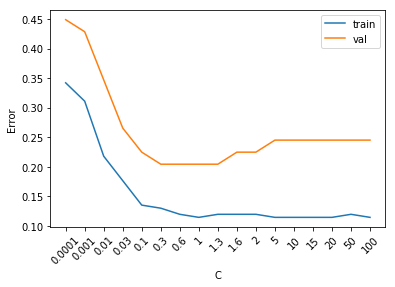

In [160]:
plt.plot(scores_tr, label = 'train')
plt.plot(scores_val, label = 'val')
plt.xticks(np.arange(len(C_vals)), C_vals, rotation=45)
plt.xlabel('C')
plt.ylabel('Error')
plt.legend()
plt.show()

# Cross-Validation

In [161]:
from sklearn.model_selection import cross_val_score

In [162]:
clf=LogisticRegression()

In [163]:
cross_val_score(clf, X_train2, y_train, scoring = 'accuracy', cv=5)

array([0.78      , 0.83333333, 0.89583333, 0.83333333, 0.79166667])

In [164]:
C_vals

[0.0001,
 0.001,
 0.01,
 0.03,
 0.1,
 0.3,
 0.6,
 1,
 1.3,
 1.6,
 2,
 5,
 10,
 15,
 20,
 50,
 100]

In [165]:
scores_val = []
for C in C_vals:
    clf = LogisticRegression(C=C)
    scores = cross_val_score(clf, X_train2, y_train, scoring = 'accuracy', cv=10)
    scores_val.append(scores.mean())

In [166]:
scores_val = 1-np.array(scores_val)

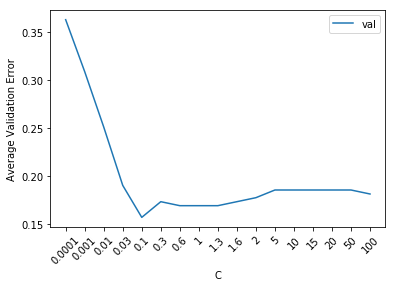

In [167]:
# plt.plot(scores_tr, label = 'train')
plt.plot(scores_val, label = 'val')
plt.xticks(np.arange(len(C_vals)), C_vals, rotation=45)
plt.xlabel('C')
plt.ylabel('Average Validation Error')
plt.legend()
plt.show()

# Grid Search

In [168]:
from sklearn.model_selection import GridSearchCV

In [169]:
clf = LogisticRegression()

In [170]:
C_vals

[0.0001,
 0.001,
 0.01,
 0.03,
 0.1,
 0.3,
 0.6,
 1,
 1.3,
 1.6,
 2,
 5,
 10,
 15,
 20,
 50,
 100]

In [171]:
params = {'C': C_vals,
         'penalty': ['l1', 'l2']}

In [172]:
grid = GridSearchCV(estimator=clf, param_grid=params, scoring='accuracy', verbose=3, n_jobs=-1, return_train_score=True)

In [173]:
grid.fit(X_train2, y_train)

Fitting 3 folds for each of 34 candidates, totalling 102 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 102 out of 102 | elapsed:    4.8s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.03, 0.1, 0.3, 0.6, 1, 1.3, 1.6, 2, 5, 10, 15, 20, 50, 100], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=3)

In [174]:
grid.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [175]:
grid.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [176]:
grid_test_scores = grid.cv_results_['mean_test_score']
grid_test_scores

array([0.54132231, 0.6322314 , 0.54132231, 0.67355372, 0.62396694,
       0.72727273, 0.64876033, 0.79752066, 0.7768595 , 0.83471074,
       0.82644628, 0.83057851, 0.81818182, 0.83057851, 0.80578512,
       0.83471074, 0.81404959, 0.82231405, 0.80991736, 0.80991736,
       0.80991736, 0.80991736, 0.80578512, 0.80991736, 0.80991736,
       0.81404959, 0.80578512, 0.80578512, 0.80578512, 0.80578512,
       0.79338843, 0.79752066, 0.79338843, 0.79338843])

In [177]:
pred= grid.predict(X_test2)

In [178]:
metrics.accuracy_score(y_test, pred)

0.9016393442622951

In [179]:
grid.cv_results_

{'mean_fit_time': array([0.00198166, 0.00332769, 0.00232792, 0.00199294, 0.00199421,
        0.00132958, 0.00399089, 0.00166138, 0.00265106, 0.00166241,
        0.00398874, 0.00166376, 0.00432221, 0.0013295 , 0.00465385,
        0.00199429, 0.00432165, 0.00133006, 0.0049874 , 0.00166154,
        0.00465488, 0.00199405, 0.0049874 , 0.00199413, 0.00731397,
        0.00232641, 0.00698217, 0.00199445, 0.00598375, 0.00166321,
        0.00664783, 0.00166734, 0.00867494, 0.00166337]),
 'std_fit_time': array([0.00001159, 0.00045978, 0.00046935, 0.00000034, 0.00000011,
        0.00046991, 0.00162957, 0.00047075, 0.00094698, 0.00047081,
        0.00000052, 0.00046839, 0.00124358, 0.00047047, 0.00047013,
        0.00081342, 0.0004698 , 0.00047042, 0.00081362, 0.00047137,
        0.0004712 , 0.00000049, 0.0008141 , 0.00000052, 0.00094072,
        0.00047058, 0.00140962, 0.00000041, 0.00141051, 0.00046985,
        0.00094021, 0.00046847, 0.00285937, 0.00047064]),
 'mean_score_time': array([0.026272

In [180]:
grid_train_scores = grid.cv_results_['mean_train_score']
grid_train_scores

array([0.54131841, 0.64671677, 0.54131841, 0.69011834, 0.64676789,
       0.75827518, 0.66535031, 0.82229124, 0.7954528 , 0.86364798,
       0.85746236, 0.86569281, 0.86366076, 0.87807683, 0.87189121,
       0.87394883, 0.87394883, 0.87187843, 0.87601922, 0.87187843,
       0.87394883, 0.87187843, 0.88221762, 0.87394883, 0.876032  ,
       0.876032  , 0.87396161, 0.876032  , 0.87394883, 0.87601922,
       0.87601922, 0.87394883, 0.87808961, 0.87394883])

In [181]:
param_values = grid.cv_results_['params']
param_values

[{'C': 0.0001, 'penalty': 'l1'},
 {'C': 0.0001, 'penalty': 'l2'},
 {'C': 0.001, 'penalty': 'l1'},
 {'C': 0.001, 'penalty': 'l2'},
 {'C': 0.01, 'penalty': 'l1'},
 {'C': 0.01, 'penalty': 'l2'},
 {'C': 0.03, 'penalty': 'l1'},
 {'C': 0.03, 'penalty': 'l2'},
 {'C': 0.1, 'penalty': 'l1'},
 {'C': 0.1, 'penalty': 'l2'},
 {'C': 0.3, 'penalty': 'l1'},
 {'C': 0.3, 'penalty': 'l2'},
 {'C': 0.6, 'penalty': 'l1'},
 {'C': 0.6, 'penalty': 'l2'},
 {'C': 1, 'penalty': 'l1'},
 {'C': 1, 'penalty': 'l2'},
 {'C': 1.3, 'penalty': 'l1'},
 {'C': 1.3, 'penalty': 'l2'},
 {'C': 1.6, 'penalty': 'l1'},
 {'C': 1.6, 'penalty': 'l2'},
 {'C': 2, 'penalty': 'l1'},
 {'C': 2, 'penalty': 'l2'},
 {'C': 5, 'penalty': 'l1'},
 {'C': 5, 'penalty': 'l2'},
 {'C': 10, 'penalty': 'l1'},
 {'C': 10, 'penalty': 'l2'},
 {'C': 15, 'penalty': 'l1'},
 {'C': 15, 'penalty': 'l2'},
 {'C': 20, 'penalty': 'l1'},
 {'C': 20, 'penalty': 'l2'},
 {'C': 50, 'penalty': 'l1'},
 {'C': 50, 'penalty': 'l2'},
 {'C': 100, 'penalty': 'l1'},
 {'C': 100, 'pen

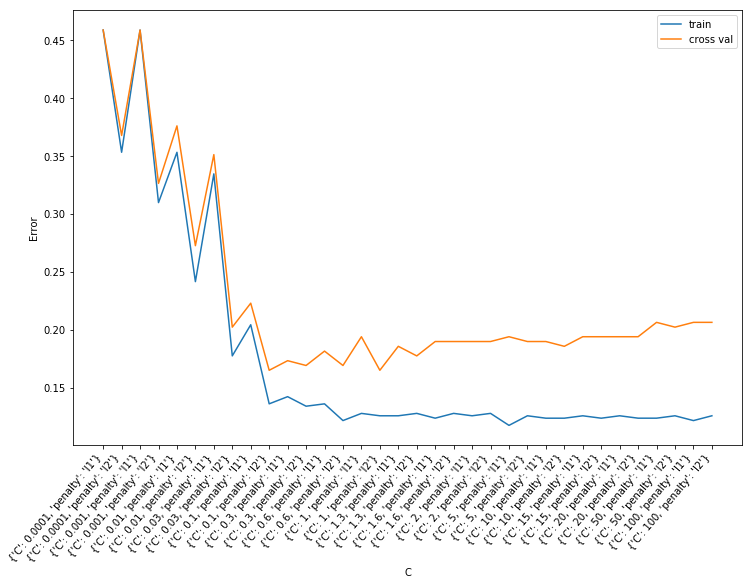

In [182]:
plt.figure(figsize=[12,8])
plt.plot(1-grid_train_scores, label = 'train')
plt.plot(1-grid_test_scores, label = 'cross val')
plt.xticks(np.arange(len(param_values)), param_values, rotation=50, ha='right')
plt.xlabel('C')
plt.ylabel('Error')
plt.legend()
plt.show()